In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

from random import uniform

TRAIN_SIZE = 200
LIMS = (-3, 3)
VAL_LIMS = (3, 4)

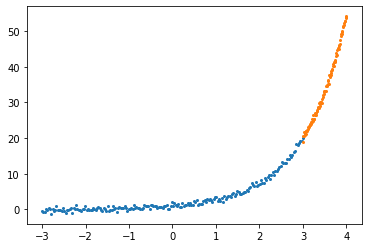

In [2]:
x_arr = torch.linspace(*LIMS, TRAIN_SIZE)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.5, size=(TRAIN_SIZE,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1), y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = torch.linspace(*VAL_LIMS, 100)
y_val = torch.exp(x_val) + torch.normal(0, 0.5, size=(100,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [3]:
env = Environment(8, train_loader, train_epochs=50, validation_loader=val_loader)

cpu


In [4]:
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities()

Train ended in 13 s


[158.3203695678711,
 217.82248657226563,
 2.9371245384216307,
 215.24292999267578,
 5.408609371185302,
 5.28945562362671,
 48.191253395080565,
 110.06183517456054]

8 ['#0000ff', '#0024ed', '#0049db', '#006dc8', '#0092b6', '#00b6a4', '#00db92', '#00ff80']
[1] [158.3203695678711] 0
[1] [217.82248657226563] 1
[1] [2.9371245384216307] 2
[1] [215.24292999267578] 3
[1] [5.408609371185302] 4
[1] [5.28945562362671] 5
[1] [48.191253395080565] 6
[1] [110.06183517456054] 7


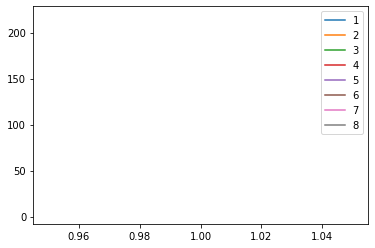

In [5]:
plot_env_history(env)

In [8]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities()
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

2.301494140625 2
2.3088983440399167 2
2.4969993019104004 2
2.765779867172241 2
3.1973838901519778 2
Evo epoch 1 ended in 16 s
1.0875883102416992 2
2.0219632828235623 2
2.457627935409546 2
2.4818523263931276 2
2.9300363731384276 2
Evo epoch 2 ended in 16 s
2.3344936323165895 2
2.51088419675827 2
2.72487060546875 2
2.746238193511963 2
2.984475965499878 2
Evo epoch 3 ended in 16 s
2.451981449127197 2
2.456927137374878 2
2.7117572450637817 2
2.9111507606506346 2
2.9313341283798215 2
Evo epoch 4 ended in 17 s
1.9293709230422973 2
2.0583543300628664 2
2.114394884109497 2
2.2835687589645386 2
2.4660348176956175 2
Evo epoch 5 ended in 17 s
2.565415897369385 2
2.573764753341675 2
2.7277637815475466 2
2.9212815952301026 2
2.9443961715698244 2
Evo epoch 6 ended in 16 s
1.9990509271621704 2
2.463526463508606 2
2.4699270439147947 2
2.5329689693450925 2
2.6540188550949098 2
Evo epoch 7 ended in 16 s
1.4730380582809448 2
2.5912036180496214 2
2.80765061378479 2
2.9812198162078856 2
3.1197164249420166 

8 ['#0000ff', '#0024ed', '#0049db', '#006dc8', '#0092b6', '#00b6a4', '#00db92', '#00ff80']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21] [2.9371245384216307, 2.89021710395813, 3.563795042037964, 2.884236288070679, 2.8253564071655273, 2.4563216543197632, 1.7387696552276612, 2.691995506286621, 1.9736298131942749, 3.1576667499542235, 2.765779867172241, 1.0875883102416992, 2.51088419675827, 2.456927137374878, 2.4660348176956175, 2.7277637815475466, 2.463526463508606, 2.5912036180496214, 2.2109101819992065, 2.3454255294799804, 3.2852789783477783] 2
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21] [2.9371245384216307, 2.89021710395813, 3.563795042037964, 2.884236288070679, 2.8253564071655273, 2.4563216543197632, 1.7387696552276612, 2.691995506286621, 1.9736298131942749, 3.1576667499542235, 2.765779867172241, 1.0875883102416992, 2.51088419675827, 2.456927137374878, 2.4660348176956175, 2.7277637815475466, 2.463526463508606, 2.59120361804

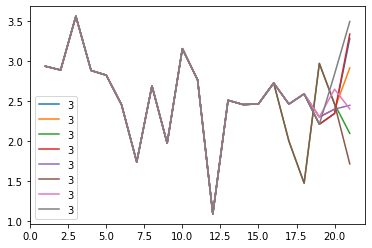

In [9]:
plot_env_history(env)

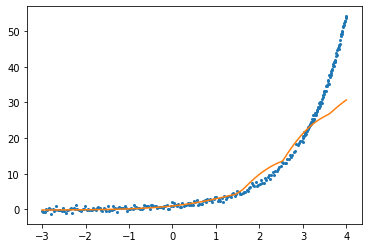

In [24]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[5].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Model")

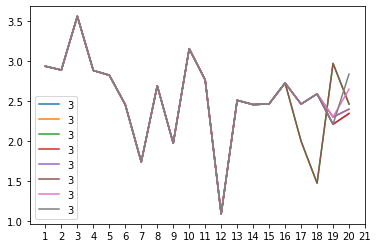

In [25]:
x = list(range(1, env.evo_epochs+1))
for entity in env.entities:
    plt.plot(x[:-1], entity.entity_history[:-1], label=entity.color+1)
plt.legend()
plt.xticks(x, x)
plt.show()